# Assignment 22 Solutions

##### 1. Create a class Smoothie and do the following:
- Create an instance attribute called ingredients.
- Create a get_cost method which calculates the total cost of the ingredients used to make the smoothie.
- Create a get_price method which returns the number from get_cost plus the number from get_cost multiplied by 1.5. Round to two decimal places.
- Create a get_name method which gets the ingredients and puts them in alphabetical order into a nice descriptive sentence. If there are multiple ingredients, add the word "Fusion" to the end but otherwise, add "Smoothie". Remember to change "-berries" to "-berry". See the examples below.

`Ingredient	   Price`  
`Strawberries   $1.50`  
`Banana	       $0.50`  
`Mango	       $2.50`  
`Blueberries	   $1.00`  
`Raspberries	   $1.00`  
`Apple	       $1.75`  
`Pineapple	   $3.50`  

**Examples:** 

`s1 = Smoothie(["Banana"])
s1.ingredients ➞ ["Banana"]
s1.get_cost() ➞ "$0.50"
s1.get_price() ➞ "$1.25"
s1.get_name() ➞ "Banana Smoothie"
s2 = Smoothie(["Raspberries", "Strawberries", "Blueberries"])
s2.ingredients ➞ ["Raspberries", "Strawberries", "Blueberries"]
s2.get_cost() ➞ "$3.50"
s2.get_price() ➞ "$8.75"
s2.get_name() ➞ "Blueberry Raspberry Strawberry Fusion"`

In [1]:
import re
class Smoothie:
    ingredients_price = {
        'Strawberries':1.50,
        'Banana':0.50,
        'Mango':2.50,
        'Blueberries':1.00,
        'Raspberries':1.00,
        'Apple':1.75,
        'Pineapple':3.50
    }
    def __init__(self,ingredients):
        self.ingredients = ingredients
        self.cost = 0
    def get_cost(self):
        for ele in self.ingredients:
            if ele in Smoothie.ingredients_price:
                self.cost += round(Smoothie.ingredients_price.get(ele,0),2)
        return '$'+str(self.cost)
    def get_price(self):
        self.price = round((self.cost*1.5)+(self.cost),2)
        return '$'+str(self.price)
    def get_name(self):
        self.name = re.sub('berries','berry',' '.join(sorted(self.ingredients)))
        self.name = self.name+' Smoothie' if len(self.ingredients) == 1 else self.name+' Fusion'
        return self.name

s1 = Smoothie(["Banana"])
print(f's1.ingredients ➞ {s1.ingredients}')
print(f's1.get_cost() ➞ "{s1.get_cost()}"')
print(f's1.get_price() ➞ "{s1.get_price()}"')
print(f's1.get_name() ➞ "{s1.get_name()}"')

s2 = Smoothie(["Raspberries", "Strawberries", "Blueberries"])
print(f's2.ingredients ➞ {s2.ingredients}')
print(f's2.get_cost() ➞ "{s2.get_cost()}"')
print(f's2.get_price() ➞ "{s2.get_price()}"')
print(f's2.get_name() ➞ "{s2.get_name()}"')

s1.ingredients ➞ ['Banana']
s1.get_cost() ➞ "$0.5"
s1.get_price() ➞ "$1.25"
s1.get_name() ➞ "Banana Smoothie"
s2.ingredients ➞ ['Raspberries', 'Strawberries', 'Blueberries']
s2.get_cost() ➞ "$3.5"
s2.get_price() ➞ "$8.75"
s2.get_name() ➞ "Blueberry Raspberry Strawberry Fusion"


##### 2. Your task is to write a program which allows teachers to create a multiple choice test in a class called Testpaper and to be also able to assign a minimum pass mark. The testpaper's subject should also be included. The attributes are in the following order:

  1. subject
  2. markscheme
  3. pass_mark

As well as that, we need to create student objects to take the test itself! Create another class called Student and do the following:

- Create an attribute called tests_taken and set the default as 'No tests taken'.
- Make a method called take_test(), which takes in the testpaper object they are completing and the student's answers. Compare what they wrote to the mark scheme, and append to the/create a dictionary assigned to tests_taken in the way as shown in the point below.
- Each key in the dictionary should be the testpaper subject and each value should be a string in the format seen in the examples below (whether or not the student has failed, and their percentage in brackets).

**Examples:**   
`paper1 = Testpaper("Maths", ["1A", "2C", "3D", "4A", "5A"], "60%")  
paper2 = Testpaper("Chemistry", ["1C", "2C", "3D", "4A"], "75%")  
paper3 = Testpaper("Computing", ["1D", "2C", "3C", "4B", "5D", "6C", "7A"], "75%")`  

`student1 = Student()   
student2 = Student()`  

`student1.tests_taken ➞ "No tests taken"
student1.take_test(paper1, ["1A", "2D", "3D", "4A", "5A"])
student1.tests_taken ➞ {"Maths" : "Passed! (80%)"}`

`student2.take_test(paper2, ["1C", "2D", "3A", "4C"])
student2.take_test(paper3, ["1A", "2C", "3A", "4C", "5D", "6C", "7B"])
student2.tests_taken ➞ {"Chemistry" : "Failed! (25%)", "Computing" : "Failed! (43%)"}`

In [2]:
class Testpaper:
    def __init__(self,subject,markscheme,pass_mark):
        self.subject = subject
        self.markscheme = markscheme
        self.pass_mark = pass_mark
        
class Student:
    def __init__(self):
        self.tests_taken = "No tests taken"
    def take_test(self,paper_name,student_response):
        correct_responses = 0
        for ele in range(len(paper_name.markscheme)):
            if paper_name.markscheme[ele] == student_response[ele]:
                correct_responses +=1
        ach_pass_mark = int(correct_responses/len(paper_name.markscheme)*100)
        needed_pass_mark = int(paper_name.pass_mark.split("%")[0])
        if self.tests_taken == 'No tests taken':
            self.tests_taken = {}
        if ach_pass_mark >= needed_pass_mark:
            self.tests_taken[paper_name.subject] = f"Passed! ({str(ach_pass_mark)}%)"
        else:
            self.tests_taken[paper_name.subject] = f'Failed! ({str(ach_pass_mark)}%)'
        
paper1 = Testpaper("Maths", ["1A", "2C", "3D", "4A", "5A"], "60%")  
paper2 = Testpaper("Chemistry", ["1C", "2C", "3D", "4A"], "75%")  
paper3 = Testpaper("Computing", ["1D", "2C", "3C", "4B", "5D", "6C", "7A"], "75%")       

student1 = Student()   
student2 = Student()

print(f'student1.tests_taken ➞ "{student1.tests_taken}"')
student1.take_test(paper1, ["1A", "2D", "3D", "4A", "5A"])
print(f'student1.tests_taken ➞ {student1.tests_taken}')

student2.take_test(paper2, ["1C", "2D", "3A", "4C"])
student2.take_test(paper3, ["1A", "2C", "3A", "4C", "5D", "6C", "7B"])
print(f'student2.tests_taken ➞ {student2.tests_taken}')

student1.tests_taken ➞ "No tests taken"
student1.tests_taken ➞ {'Maths': 'Passed! (80%)'}
student2.tests_taken ➞ {'Chemistry': 'Failed! (25%)', 'Computing': 'Failed! (42%)'}


##### 3. Due to unforseen circumstances in Suburbia, the trains will be delayed by a further 10 minutes.
Create a function that will help to plan out and manage these delays! Create a function called manage_delays that does the following:
- Parameters will be the train object, a destination and number of minutes the delay is.
- Increment to the train object's expected_time by the delay, if the destination given is in the train object's destinations.

**Examples:**   
`trains = [
  Train(["Townsville", "Suburbia", "Urbantska"], "13:04"),
  Train(["Farmsdale", "Suburbia", "Lakeside Valley"], "13:20"),
  Train(["Suburbia", "Townsville", "Lakeside Valley"], "13:22")
]`

`for t in trains:
    manage_delays(t, "Lakeside Valley", 60)` 
    
`trains[0].expected_time ➞ "13:04"
trains[1].expected_time ➞ "14:20"
trains[2].expected_time ➞ "14:22"`

In [3]:
class Train:
    def __init__(self,destination_list,expected_time):
        self.destination_list = destination_list
        self.expected_time = expected_time

def manage_delays(train_obj,destination_point,delay):
    if destination_point in train_obj.destination_list:
        ex_time = train_obj.expected_time.split(":")
        new_ex_time = str((int(ex_time[0])*60+int(ex_time[1])+int(delay))//60)+':'+str((int(ex_time[0])*60+int(ex_time[1])+int(delay))%60)
        train_obj.expected_time = new_ex_time

trains = [
  Train(["Townsville", "Suburbia", "Urbantska"], "13:04"),
  Train(["Farmsdale", "Suburbia", "Lakeside Valley"], "13:20"),
  Train(["Suburbia", "Townsville", "Lakeside Valley"], "13:22")
]

for t in trains:
    manage_delays(t, "Lakeside Valley", 60)
        
print(f'trains[0].expected_time ➞ "{trains[0].expected_time}"')    
print(f'trains[1].expected_time ➞ "{trains[1].expected_time}"')    
print(f'trains[2].expected_time ➞ "{trains[2].expected_time}"')    

trains[0].expected_time ➞ "13:04"
trains[1].expected_time ➞ "14:20"
trains[2].expected_time ➞ "14:22"


##### 4. Ted works as a computer programmer at Minecraft Inc. His boss has just given him an important assignment to update the code for the minecart tracks by the end of April. However, he has recently had to self-isolate due to Corvid-19 and has left the code for the tracks. BACK AT WORK!! He has the shorthand for the tracks he's supposed to look at, and where the carts are suppost to end up, but not the actual code.

He knows that:
  1. "-->" = "Speed-Up Track" ⁠— If a minecart interacts with this track, it's velocity increases by 2.67 BPS unless it's at its maximum speed of 8 BPS.
  2. "<-->" = "Powered Track" ⁠— If a minecart interacts with this track, it's velocity remains the same.
  3. "<--" = "Slow-Down Track" ⁠— If a minecart interacts with this track, it's velocity decreases by 2.67 BPS unless it's velocity equals 0, at which point it stops.
  4. "---" = "Unpowered Track" ⁠— If a minecart interacts with this track, it's velocity decreases by 1 BPS unless it's velocity equals 0, at which point it stops.
  
Help Ted by writing a class for the tracks that interact with the provided Minecart class as shown above. And then write a function that will take a list of the shorthand tracks and:
   
   - If the Minecart reaches the last peice of Track, return True.
   - Else return the index of the Track where the Minecart stops.
   
**Examples:**  
`mine_run(["-->", "-->", "-->", "<--", "<--", "<--"]) ➞ True`  
`mine_run(["-->", "<--", "-->", "-->", "<-->", "---"]) ➞ 1`  

In [4]:
class minecraft:
    def __init__(self,tracks):
        self.tracks = tracks
        
def mine_run(tracks):
    mine_vel = 0  
    output = 0
    for ele in range(len(tracks)):
        if tracks[ele] == '-->':
            if mine_vel+2.67 >= 8: mine_vel = 8 # resetted to max mine_val
            else: mine_vel +=2.67
        elif tracks[ele] == '<-->': continue
        elif tracks[ele] == '<--':
            if mine_vel-2.67 <= 0: output = True if ele == len(tracks)-1 else ele; break
            else: mine_vel -=2.67
        else:
            if mine_vel-1 <= 0: output = True if ele == len(tracks)-1 else ele; break
            else: mine_vel -=1        
    return output

mine_track_1 = minecraft(["-->", "-->", "-->", "<--", "<--", "<--"])
print(f'mine_run({mine_track_1.tracks}) ➞ {mine_run(mine_track_1.tracks)}')
mine_track_2 = minecraft(["-->", "<--", "-->", "-->", "<-->", "---"])
print(f'mine_run({mine_track_2.tracks}) ➞ {mine_run(mine_track_2.tracks)}')

mine_run(['-->', '-->', '-->', '<--', '<--', '<--']) ➞ True
mine_run(['-->', '<--', '-->', '-->', '<-->', '---']) ➞ 1


##### 5. Make a Rectangle class with four parameters, an x, a y (representing the top-left corner of the rectangle), a width and a height exclusively in that order.

Lastly, make a function intersecting that takes two Rectangle objects and returns True if those objects are intersecting (colliding), else return False.

**Examples:**   
`a = Rectangle(10, 20, 100, 20)`  
`b = Rectangle(10, 40, 15, 20)`  
`c = Rectangle(50, 50, 20, 30)`  

`intersecting(a, b) ➞ True`  
`intersecting(a, c) ➞ False`  
`intersecting(b, c) ➞ True`  

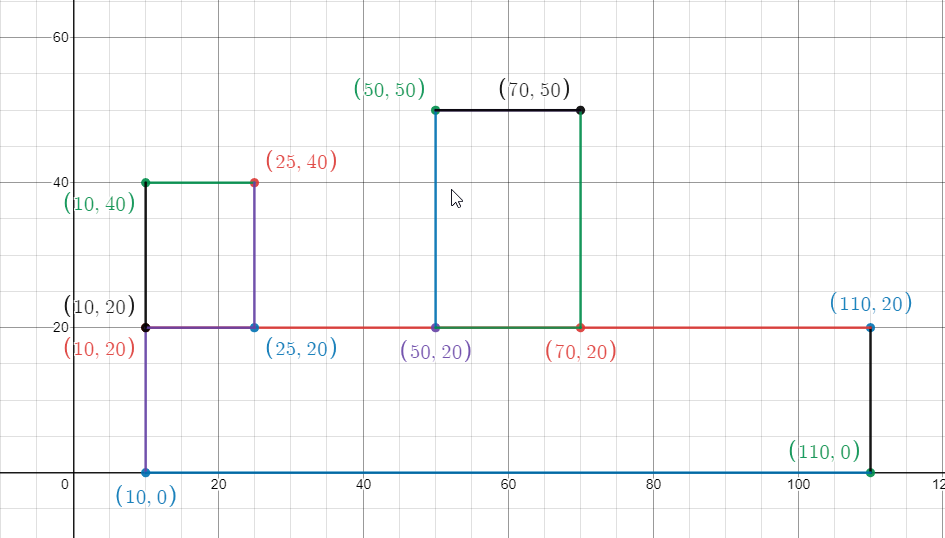

In [5]:
def intersecting(rectangle1, rectangle2):
    output = False
    if (rectangle2.y-rectangle1.y == rectangle1.height) or (rectangle2.y-rectangle1.y + rectangle1.height == rectangle2.height):
        output = True
    print(f'intersecting{rectangle1.__dict__.values(),rectangle2.__dict__.values()} ➞ {output}')

class Rectangle:
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height

a = Rectangle(10, 20, 100, 20)
b = Rectangle(10, 40, 15, 20)
c = Rectangle(50, 50, 20, 30)
intersecting(a, b)
intersecting(a, c)
intersecting(b, c)

intersecting(dict_values([10, 20, 100, 20]), dict_values([10, 40, 15, 20])) ➞ True
intersecting(dict_values([10, 20, 100, 20]), dict_values([50, 50, 20, 30])) ➞ False
intersecting(dict_values([10, 40, 15, 20]), dict_values([50, 50, 20, 30])) ➞ True
